In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
import pandas as pd
df = pd.read_csv('C:\Users\JANGEUNSUNG\data\drug200.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2055756577.py, line 2)

In [112]:
data.nunique()

ID         30200
가입일          345
음성사서함이용       76
주간통화시간      2771
주간통화횟수       239
주간통화요금       735
저녁통화시간      2606
저녁통화횟수       241
저녁통화요금      1840
밤통화시간       2545
밤통화횟수        233
밤통화요금       1216
상담전화건수        11
전화해지여부         2
dtype: int64

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figu

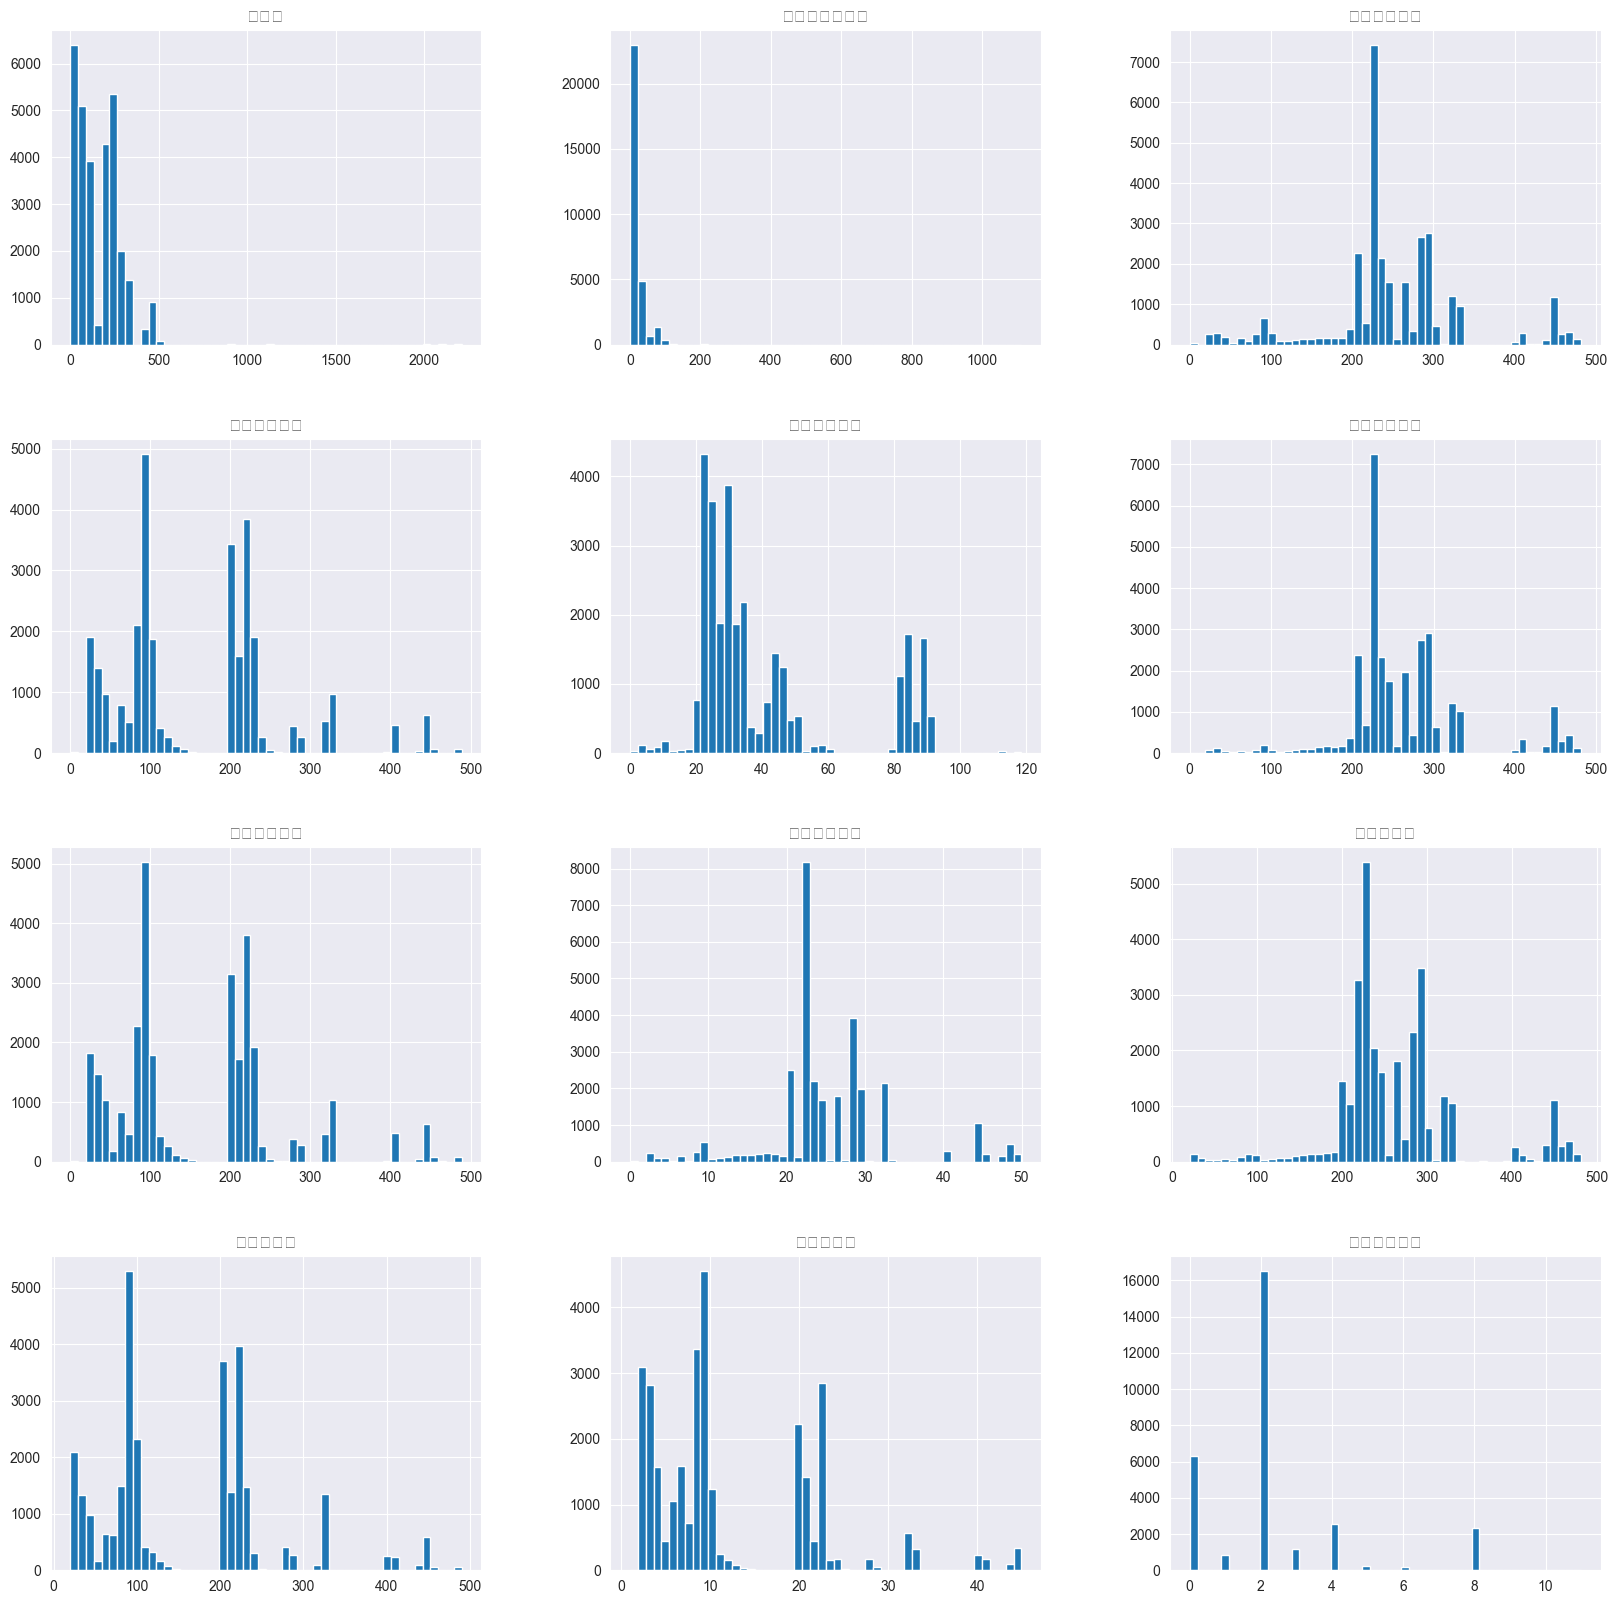

In [113]:
data.drop(['전화해지여부'], axis=1).hist(bins=50, figsize=(20, 20))
plt.show()

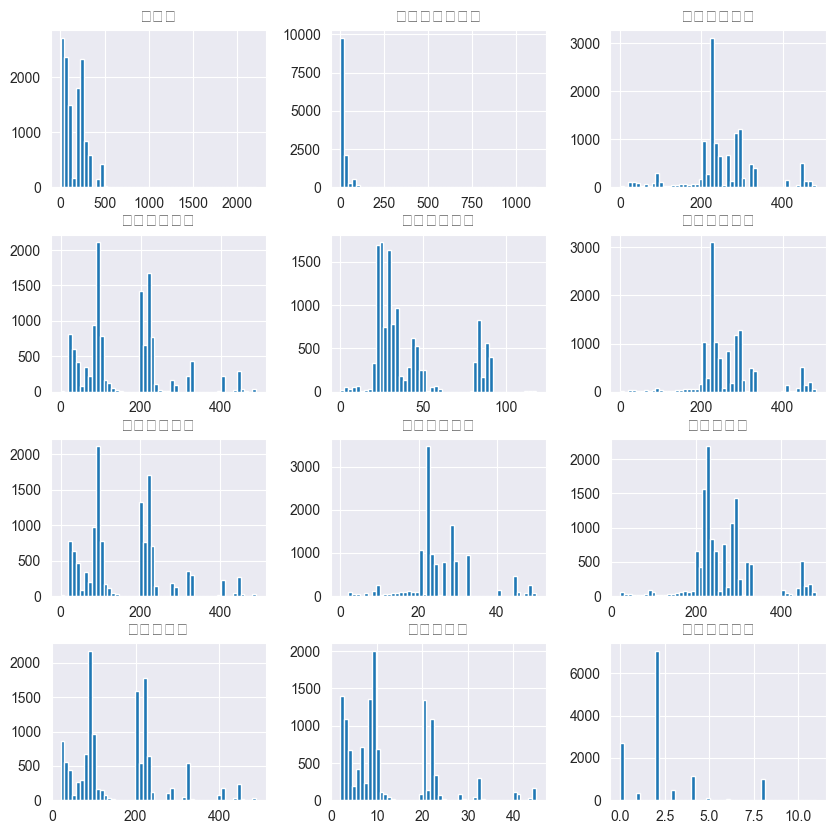

In [114]:
tdata.hist(bins=50, figsize=(10, 10))
plt.show()

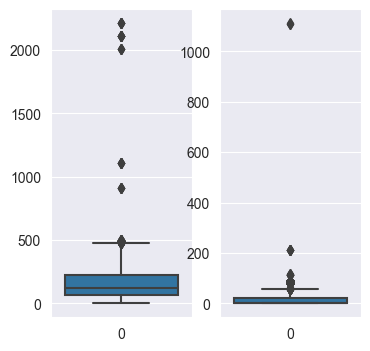

[<matplotlib.lines.Line2D object at 0x0000016E906104C0>, <matplotlib.lines.Line2D object at 0x0000016E90610850>]
Whisker y-values for subplot 1: [1. 1.]
Whisker y-values for subplot 1: [475. 475.]
[<matplotlib.lines.Line2D object at 0x0000016E8FCA67A0>, <matplotlib.lines.Line2D object at 0x0000016E8DA533D0>]
Whisker y-values for subplot 2: [0. 0.]
Whisker y-values for subplot 2: [55. 55.]


In [115]:
fig, ax = plt.subplots(1, 2, figsize=(4, 4))
sns.boxplot(data['가입일'], ax=ax[0])
sns.boxplot(data['음성사서함이용'], ax=ax[1])
plt.show()

for i in range(len(ax)):
    whiskers = ax[i].lines[2:4]
    print(ax[i].lines[2:4])
    for whisker in whiskers:
        y_data = whisker.get_ydata()
        print(f"Whisker y-values for subplot {i + 1}: {y_data}")

In [116]:
test_ID = data['ID']
test_ID

0        TRAIN_00000
1        TRAIN_00001
2        TRAIN_00002
3        TRAIN_00003
4        TRAIN_00004
            ...     
30195    TRAIN_30195
30196    TRAIN_30196
30197    TRAIN_30197
30198    TRAIN_30198
30199    TRAIN_30199
Name: ID, Length: 30200, dtype: object

In [117]:
print(len(data.columns))

14


In [118]:
print(len(data.columns))

14


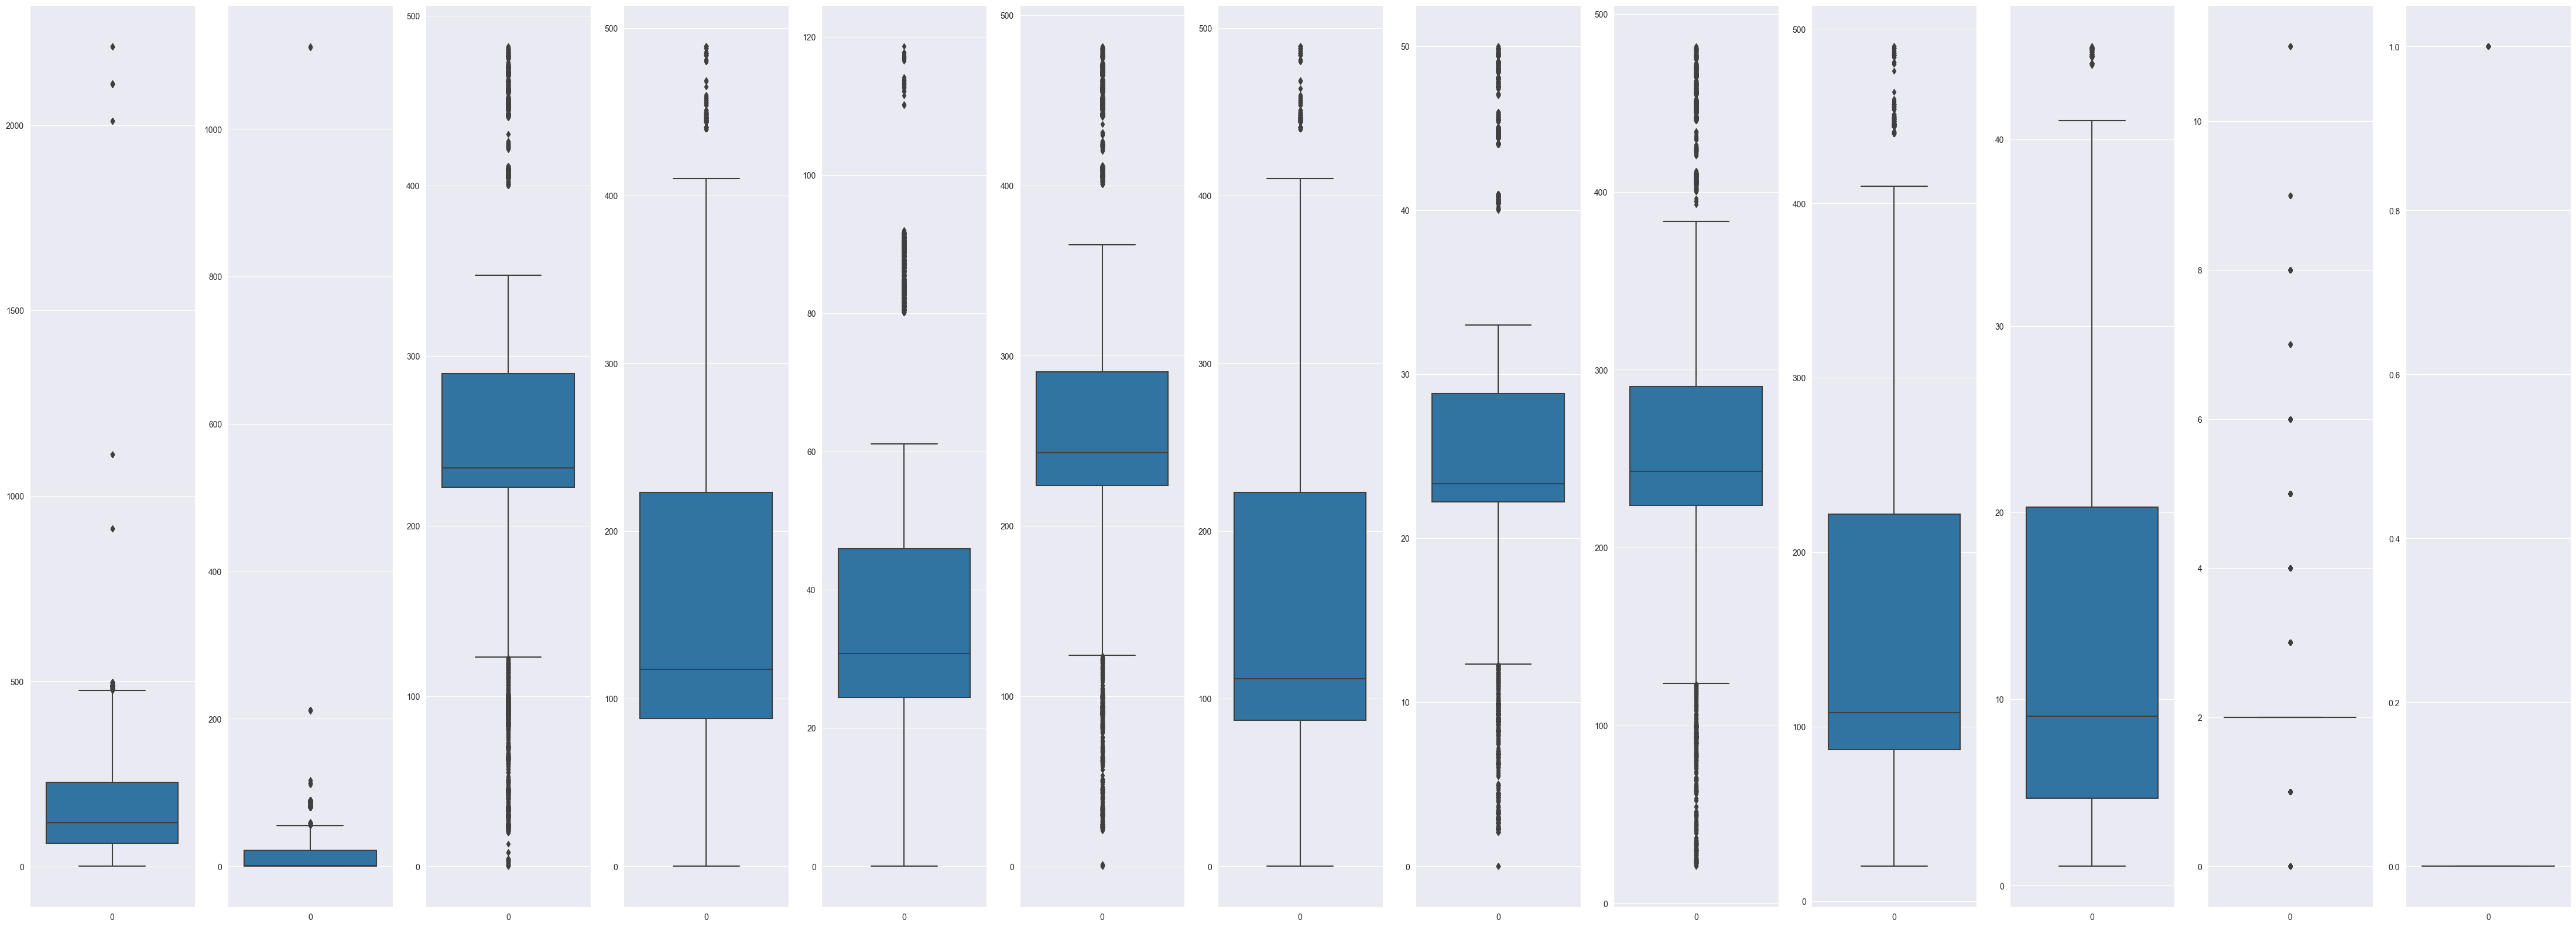

In [119]:
data.drop(['ID'], axis=1, inplace=True)
# data.reset_index(inplace=True)

fig, ax = plt.subplots(1, len(data.columns), figsize= (56, 20))
for i, f in enumerate(data.columns):
    sns.boxplot(data[f], ax=ax[i])
# plt.figure(figsize=(4, 7)) # 그림의 크기 설정
# plt.title("Interest Rate") # 그림의 제목 설정
# sns.boxplot(y='InterestRate', data=data) # y에 대입해줌으로써 세로로 boxplot 생성

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.0 MB


In [121]:
def extract_outliers(data,col):

  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5) # maximum 값
  upper_bound = q3 + (iqr*1.5) # minimum 값
  index = np.where((data[col].values > upper_bound) | (data[col].values < lower_bound))[0]
  out = data.loc[index, col] # 해당하는 데이터 추출출
  out = out.to_frame()
  return out

In [122]:
outlier1 = extract_outliers(data, "가입일")
outlier2 = extract_outliers(data, "음성사서함이용")
data = data.drop(outlier1.index, errors='ignore', axis=0)
data = data.drop(outlier2.index, errors='ignore', axis=0)
data.reset_index(drop=True, inplace=True)

C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.draw()
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current fo

<AxesSubplot: >

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

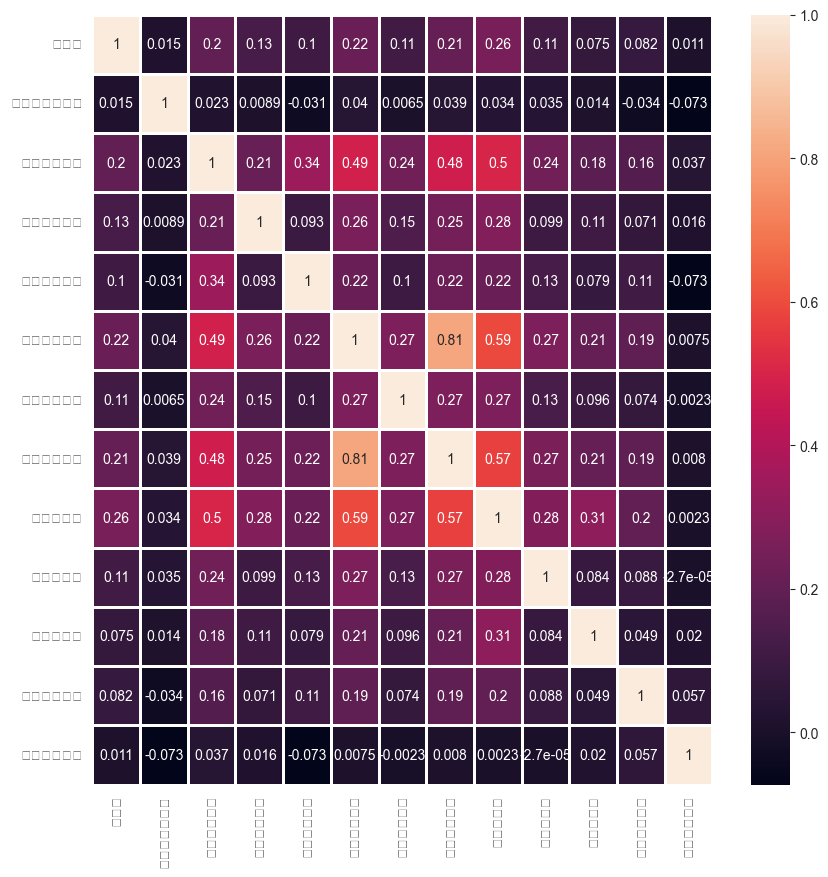

In [123]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth=1)

In [124]:
corr_matrix['전화해지여부'].sort_values(ascending=False)

전화해지여부     1.000000
상담전화건수     0.057148
주간통화시간     0.036856
밤통화요금      0.019575
주간통화횟수     0.016077
가입일        0.010653
저녁통화요금     0.008011
저녁통화시간     0.007477
밤통화시간      0.002323
밤통화횟수     -0.000027
저녁통화횟수    -0.002258
음성사서함이용   -0.072520
주간통화요금    -0.072887
Name: 전화해지여부, dtype: float64

In [125]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='주간통화요금', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='주간통화횟수', ylabel='주간통화시간'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화요금'>,
        <AxesSubplot: xlabel='주간통화요금', ylabel='주간통화요금'>,
        <AxesSubplot: xlabel='주간통화횟수', ylabel='주간통화요금'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화횟수'>,
        <AxesSubplot: xlabel='주간통화요금', ylabel='주간통화횟수'>,
        <AxesSubplot: xlabel='주간통화횟수', ylabel='주간통화횟수'>]], dtype=object)

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

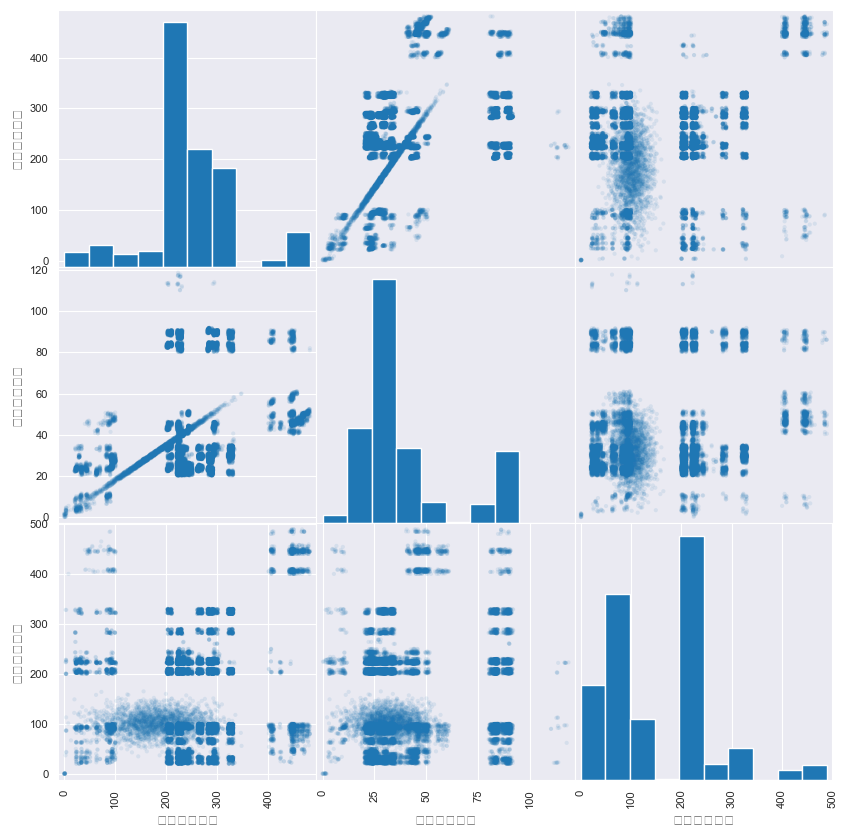

In [126]:
attributes = ['주간통화시간', '주간통화요금', '주간통화횟수']
scatter_matrix(data[attributes], figsize=(10, 10), alpha=0.1)

array([[<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='주간통화요금', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='주간통화횟수', ylabel='주간통화시간'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화요금'>,
        <AxesSubplot: xlabel='주간통화요금', ylabel='주간통화요금'>,
        <AxesSubplot: xlabel='주간통화횟수', ylabel='주간통화요금'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화횟수'>,
        <AxesSubplot: xlabel='주간통화요금', ylabel='주간통화횟수'>,
        <AxesSubplot: xlabel='주간통화횟수', ylabel='주간통화횟수'>]], dtype=object)

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

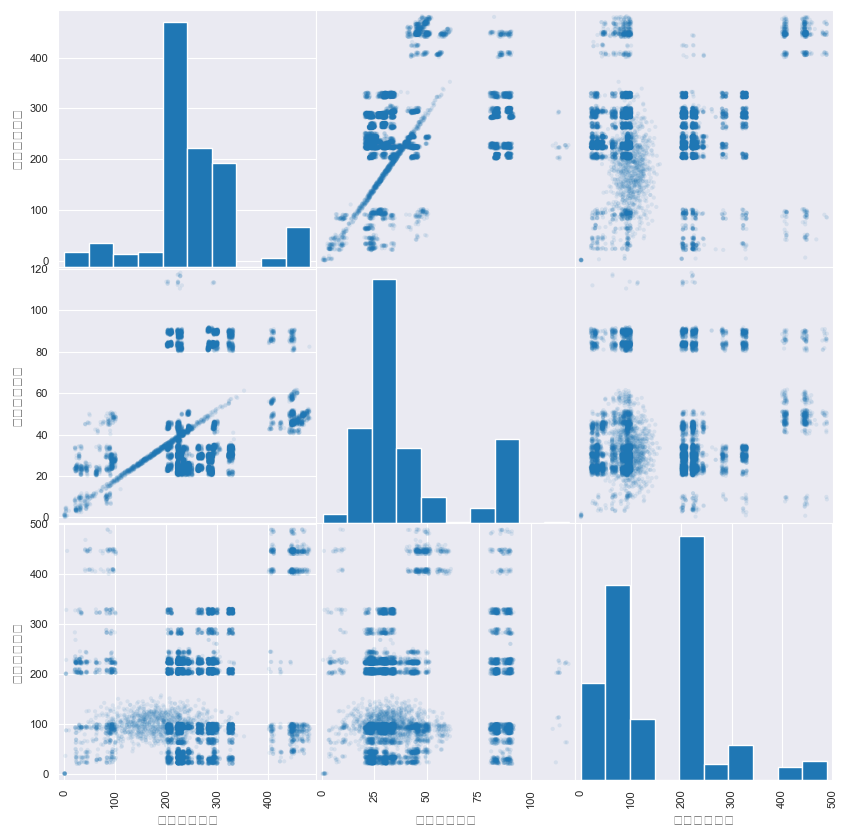

In [127]:
attributes = ['주간통화시간', '주간통화요금', '주간통화횟수']
scatter_matrix(tdata[attributes], figsize=(10, 10), alpha=0.1)

array([[<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='저녁통화시간', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='밤통화시간', ylabel='주간통화시간'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot: xlabel='저녁통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot: xlabel='밤통화시간', ylabel='저녁통화시간'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='밤통화시간'>,
        <AxesSubplot: xlabel='저녁통화시간', ylabel='밤통화시간'>,
        <AxesSubplot: xlabel='밤통화시간', ylabel='밤통화시간'>]], dtype=object)

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

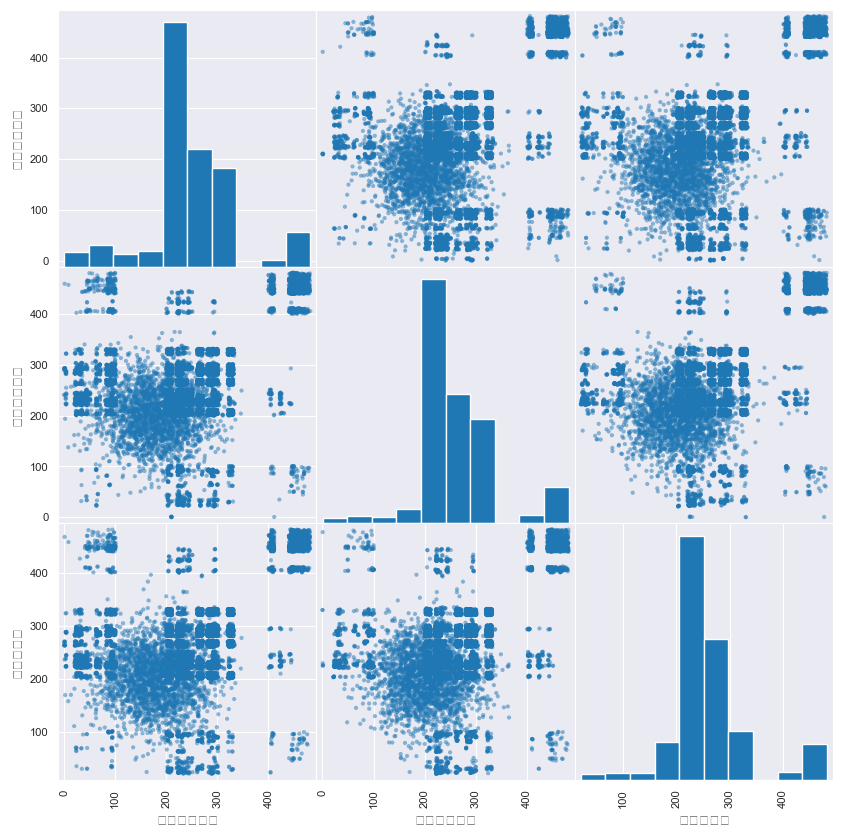

In [128]:
attributes = ['주간통화시간', '저녁통화시간', '밤통화시간']
scatter_matrix(data[attributes], figsize=(10, 10))

array([[<AxesSubplot: xlabel='주간통화시간', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='저녁통화시간', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='밤통화시간', ylabel='주간통화시간'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot: xlabel='저녁통화시간', ylabel='저녁통화시간'>,
        <AxesSubplot: xlabel='밤통화시간', ylabel='저녁통화시간'>],
       [<AxesSubplot: xlabel='주간통화시간', ylabel='밤통화시간'>,
        <AxesSubplot: xlabel='저녁통화시간', ylabel='밤통화시간'>,
        <AxesSubplot: xlabel='밤통화시간', ylabel='밤통화시간'>]], dtype=object)

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

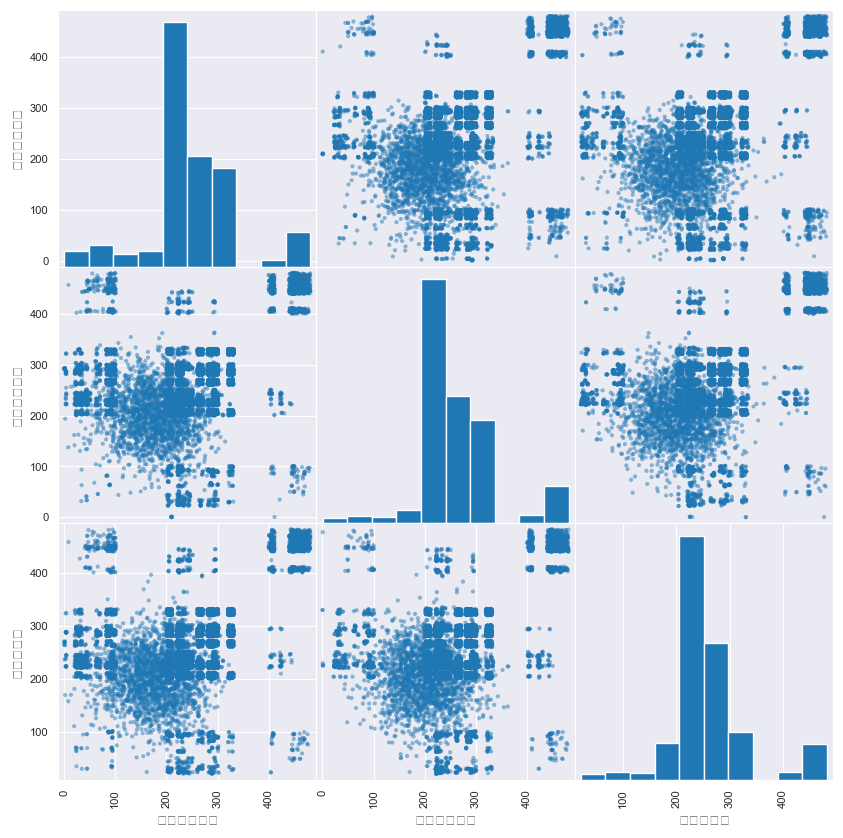

In [129]:
attributes = ['주간통화시간', '저녁통화시간', '밤통화시간']
scatter_matrix(data[data['전화해지여부']==0][attributes], figsize=(10, 10))

array([[<AxesSubplot: xlabel='가입일', ylabel='가입일'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='가입일'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='가입일'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='가입일'>],
       [<AxesSubplot: xlabel='가입일', ylabel='음성사서함이용'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='음성사서함이용'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='음성사서함이용'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='음성사서함이용'>],
       [<AxesSubplot: xlabel='가입일', ylabel='상담전화건수'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='상담전화건수'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='상담전화건수'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='상담전화건수'>],
       [<AxesSubplot: xlabel='가입일', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='주간통화시간'>]], dtype=object)

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

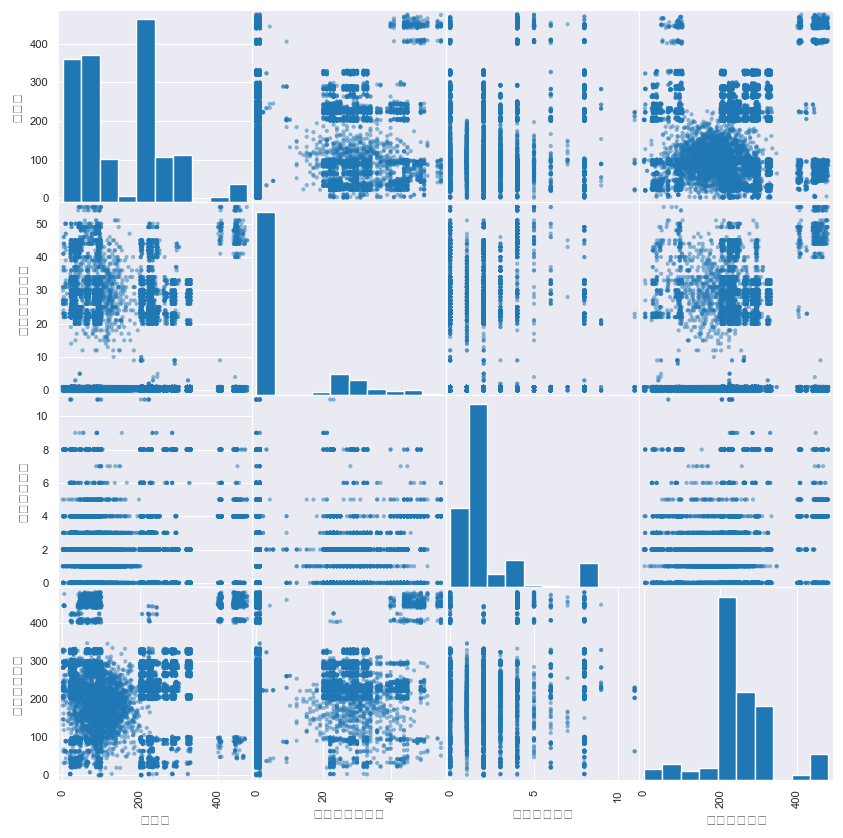

In [130]:
attributes = ['가입일', '음성사서함이용', '상담전화건수', '주간통화시간']
scatter_matrix(data[attributes], figsize=(10, 10))

array([[<AxesSubplot: xlabel='가입일', ylabel='가입일'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='가입일'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='가입일'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='가입일'>],
       [<AxesSubplot: xlabel='가입일', ylabel='음성사서함이용'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='음성사서함이용'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='음성사서함이용'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='음성사서함이용'>],
       [<AxesSubplot: xlabel='가입일', ylabel='상담전화건수'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='상담전화건수'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='상담전화건수'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='상담전화건수'>],
       [<AxesSubplot: xlabel='가입일', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='음성사서함이용', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='상담전화건수', ylabel='주간통화시간'>,
        <AxesSubplot: xlabel='주간통화시간', ylabel='주간통화시간'>]], dtype=object)

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

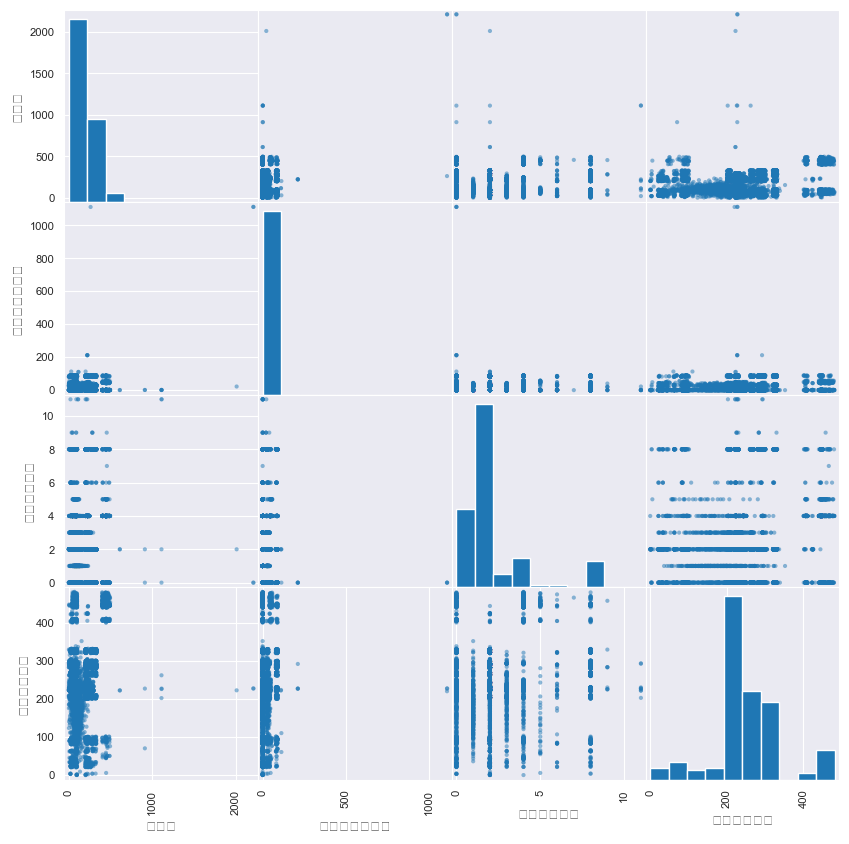

In [131]:
attributes = ['가입일', '음성사서함이용', '상담전화건수', '주간통화시간']
scatter_matrix(tdata[attributes], figsize=(10, 10))

C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

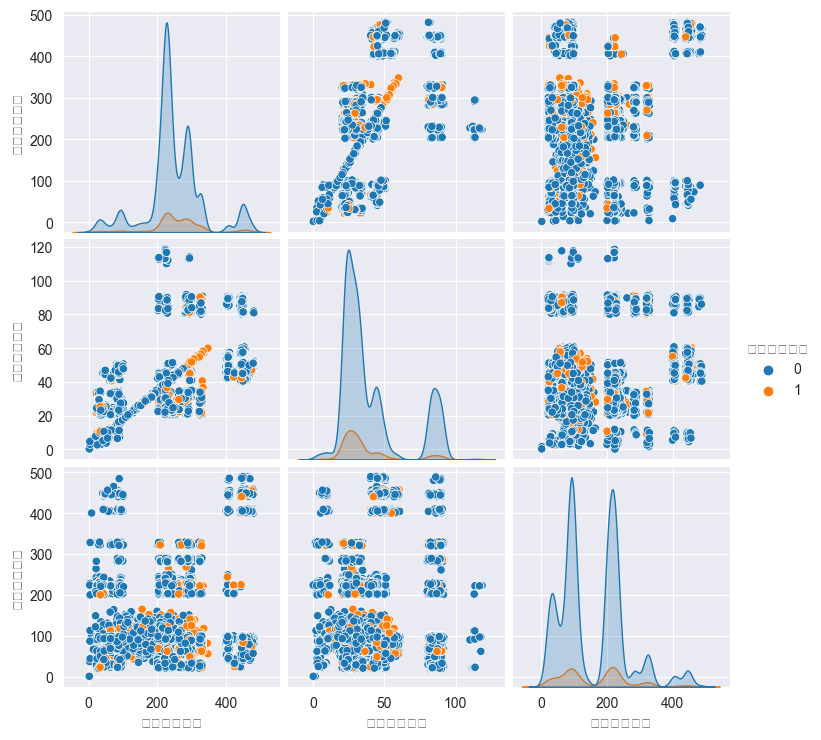

In [132]:
attributes = ['주간통화시간', '주간통화요금', '주간통화횟수', '전화해지여부']
sns.pairplot(data[attributes], hue='전화해지여부')

C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C

C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\nbril\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyp

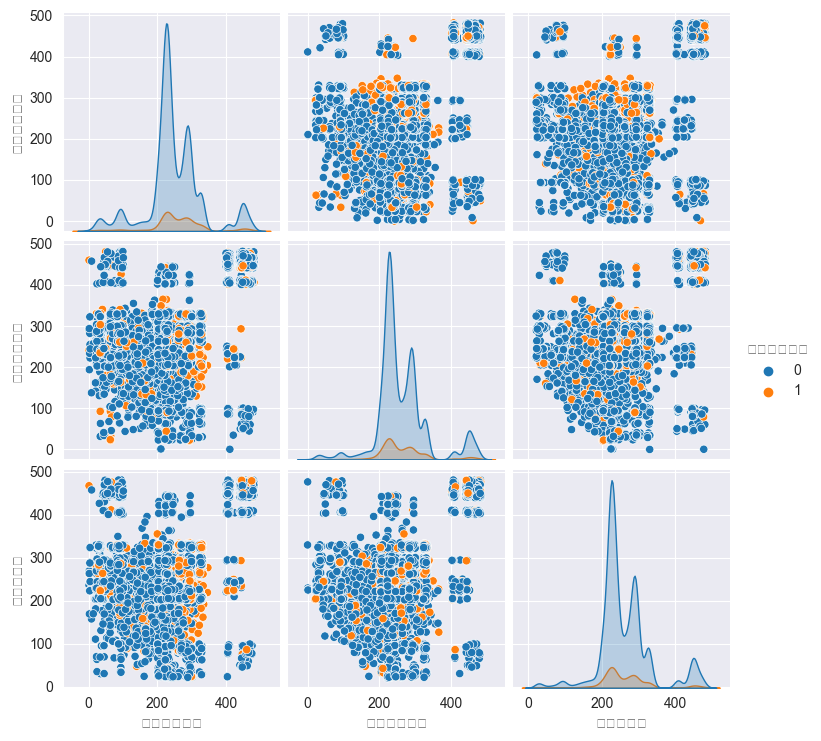

In [133]:
attributes = ['주간통화시간', '저녁통화시간', '밤통화시간', '전화해지여부']
sns.pairplot(data[attributes], hue='전화해지여부')

In [134]:
data['전체통화시간'] = data['주간통화시간'] + data['저녁통화시간'] + data['밤통화시간']
data['전체통화요금'] = data['주간통화요금'] + data['저녁통화요금'] + data['밤통화요금']
data['전체통화횟수'] = data['주간통화시간'] + data['저녁통화시간'] + data['밤통화시간']
data['평균통화시간'] = data['전체통화시간'] / data['전체통화횟수']
data['평균통화요금'] = data['전체통화요금'] / data['전체통화시간']

In [135]:
data['주간통화사용'] = data['주간통화시간'] + data['주간통화횟수']
data['저녁통화사용'] = data['저녁통화시간'] + data['저녁통화횟수']
data['밤통화사용'] = data['밤통화시간'] + data['밤통화횟수']
data['전체통화사용'] = data['주간통화사용'] + data['저녁통화사용'] + data['밤통화사용']

In [136]:
data['평균상담전화건수'] = data['상담전화건수'] / data['가입일']

In [162]:
tdata['전체통화시간'] = tdata['주간통화시간'] + tdata['저녁통화시간'] + tdata['밤통화시간']
tdata['전체통화요금'] = tdata['주간통화요금'] + tdata['저녁통화요금'] + tdata['밤통화요금']
tdata['전체통화횟수'] = tdata['주간통화시간'] + tdata['저녁통화시간'] + tdata['밤통화시간']
tdata['평균통화시간'] = tdata['전체통화시간'] / tdata['전체통화횟수']
tdata['평균통화요금'] = tdata['전체통화요금'] / tdata['전체통화시간']
tdata['주간통화사용'] = tdata['주간통화시간'] + tdata['주간통화횟수']
tdata['저녁통화사용'] = tdata['저녁통화시간'] + tdata['저녁통화횟수']
tdata['밤통화사용'] = tdata['밤통화시간'] + tdata['밤통화횟수']
tdata['전체통화사용'] = tdata['주간통화사용'] + tdata['저녁통화사용'] + tdata['밤통화사용']
tdata['평균상담전화건수'] = tdata['상담전화건수'] / tdata['가입일']

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
print()

In [139]:
y = data['전화해지여부']
x = data.drop(['전화해지여부'], axis=1)
x.columns = x.columns.astype(str)

(x_train, x_test, y_train, y_test) = train_test_split(x, y, shuffle=True, random_state=42)

In [140]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.66763016,  1.19230097, -0.23698652, ..., -1.13506338,
        -1.30489878, -0.28330039],
       [-0.7123766 ,  2.79063304, -1.74182839, ..., -0.78384066,
        -1.17362986, -0.3865533 ],
       [ 1.2068381 ,  1.11618992,  0.54490575, ...,  0.20258729,
         0.93602771, -0.30452659],
       ...,
       [-0.33767278, -0.48214214, -1.0645894 , ..., -1.21875596,
        -1.43646948, -0.18704767],
       [-0.84032425, -0.5582532 , -0.3211903 , ...,  0.71761856,
         0.24648865, -0.3865533 ],
       [-1.07794131, -0.48214214, -1.70814688, ..., -0.47625254,
        -1.41655281,  0.2497079 ]])

In [141]:
pca = PCA()
pca.fit(x_train)

PCA()

In [142]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[8.32903198e+00 2.43270287e+00 1.43411149e+00 1.40960695e+00
 1.36460474e+00 1.18998595e+00 1.01003389e+00 9.59060998e-01
 9.15422674e-01 7.15911355e-01 5.27245666e-01 4.67085184e-01
 2.27339934e-01 1.88486181e-02 8.97477054e-31 3.52211520e-31
 2.25610491e-31 1.25365864e-31 6.24517822e-32 5.76889926e-32
 1.13416672e-39 5.24527767e-67]
[3.96601830e-01 1.15837520e-01 6.82877967e-02 6.71209688e-02
 6.49781078e-02 5.66633202e-02 4.80945794e-02 4.56674135e-02
 4.35894962e-02 3.40894061e-02 2.51057502e-02 2.22411007e-02
 1.08251996e-02 8.97510833e-04 4.27349833e-32 1.67711847e-32
 1.07428491e-32 5.96952099e-33 2.97375388e-33 2.74696509e-33
 5.40053871e-41 2.49763325e-68]


In [143]:
sum = 0
for i, ratio in enumerate(pca.explained_variance_ratio_):
    sum += ratio
    print(f'{sum} by PCA{i}')

0.3966018300113719 by PCA0
0.5124393500585104 by PCA1
0.5807271467480628 by PCA2
0.6478481155337614 by PCA3
0.7128262233218676 by PCA4
0.7694895435294196 by PCA5
0.8175841229317504 by PCA6
0.86325153638317 by PCA7
0.9068410326018457 by PCA8
0.9409304387024583 by PCA9
0.966036188879467 by PCA10
0.9882772895622218 by PCA11
0.999102489166709 by PCA12
0.9999999999999999 by PCA13
0.9999999999999999 by PCA14
0.9999999999999999 by PCA15
0.9999999999999999 by PCA16
0.9999999999999999 by PCA17
0.9999999999999999 by PCA18
0.9999999999999999 by PCA19
0.9999999999999999 by PCA20
0.9999999999999999 by PCA21


In [144]:
x_train = pca.fit_transform(x_train)
x_train = pd.DataFrame(x_train)
x_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-3.119921,-0.352632,0.646915,-0.839045,0.463715,-1.656293,1.137802,0.225374,1.092141,1.235983,...,0.923494,-0.016908,3.276903e-15,-3.997669e-15,-3.213897e-15,-7.359369e-15,3.048734e-15,1.274896e-15,3.498382e-20,-6.357300e-34
1,-3.626746,-0.746191,-0.601542,-0.478521,-0.298352,-0.304919,2.781487,-0.809197,0.139540,-0.935783,...,0.283778,-0.061698,2.071906e-15,1.766954e-16,2.602849e-16,1.386457e-15,2.969218e-15,-5.154051e-16,1.641300e-20,4.227621e-34
2,2.665911,2.735987,0.484093,-1.183141,-0.683604,1.249821,0.871487,-0.762231,0.848566,-0.032902,...,0.470155,-0.129174,-4.107171e-14,6.146213e-14,2.479955e-14,1.689417e-14,1.998252e-15,-5.747259e-15,1.055052e-20,-2.541148e-34
3,1.554905,-0.410167,1.627786,-1.321399,-0.407971,0.198572,-0.432835,0.887300,1.266496,0.229405,...,-1.422975,-0.019246,-5.807719e-15,1.551947e-15,7.357986e-15,1.338114e-14,-2.783103e-15,-1.460296e-15,-2.732240e-20,6.982621e-34
4,-0.240166,2.794427,2.599399,2.101836,1.262246,-0.130029,0.086513,-0.237436,-1.481899,-0.332548,...,0.582505,-0.069103,-1.409462e-15,-5.671005e-16,1.569868e-18,1.253864e-15,4.137815e-15,1.805665e-15,2.376020e-20,6.319555e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21159,-0.898592,-0.275057,-0.923823,0.488697,1.013837,-0.067046,0.336681,1.485003,-0.387341,0.009223,...,0.166971,0.011592,1.271109e-16,-2.034113e-18,1.753084e-17,-1.417860e-16,1.054123e-16,-1.791772e-16,-3.384501e-22,2.245700e-37
21160,-0.342330,2.779133,0.016974,-0.453001,-0.719891,-1.543077,-1.033546,-0.690070,0.114394,-0.232318,...,0.539244,-0.029176,-3.173569e-17,-3.864734e-17,6.841247e-17,-5.339984e-17,2.722599e-16,8.080044e-17,7.793727e-22,1.982327e-35
21161,-4.167343,0.139928,0.070541,0.056565,-0.194406,-0.230458,-0.457601,0.144227,0.097828,0.063229,...,0.150523,0.028348,7.009998e-17,9.209018e-17,-1.799925e-17,-1.786646e-16,8.886351e-17,-1.719517e-16,2.403233e-23,1.934711e-35
21162,-0.023127,-1.922468,-1.450512,0.047326,-0.336334,0.209680,-0.305190,0.267023,-1.546254,-0.365922,...,0.084500,0.009573,3.656665e-16,1.160481e-16,4.308044e-18,-3.203854e-16,1.027369e-16,-2.634347e-16,-6.436269e-22,-3.616449e-35


In [145]:
# target 열 추가
# x_train['target'] = data['전화해지여부'] # 시각화에 바로 사용하기 위해 떼어놨던 target을 DataFrame에 다시 추가


# 그래프 출력
# sns.pairplot(data[[0, 1, 2, '전화해지여부']], hue='전화해지여부')
# plt.show()

In [146]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-3.119921,-0.352632,0.646915,-0.839045,0.463715,-1.656293,1.137802,0.225374,1.092141,1.235983,...,0.923494,-0.016908,3.276903e-15,-3.997669e-15,-3.213897e-15,-7.359369e-15,3.048734e-15,1.274896e-15,3.498382e-20,-6.357300e-34
1,-3.626746,-0.746191,-0.601542,-0.478521,-0.298352,-0.304919,2.781487,-0.809197,0.139540,-0.935783,...,0.283778,-0.061698,2.071906e-15,1.766954e-16,2.602849e-16,1.386457e-15,2.969218e-15,-5.154051e-16,1.641300e-20,4.227621e-34
2,2.665911,2.735987,0.484093,-1.183141,-0.683604,1.249821,0.871487,-0.762231,0.848566,-0.032902,...,0.470155,-0.129174,-4.107171e-14,6.146213e-14,2.479955e-14,1.689417e-14,1.998252e-15,-5.747259e-15,1.055052e-20,-2.541148e-34
3,1.554905,-0.410167,1.627786,-1.321399,-0.407971,0.198572,-0.432835,0.887300,1.266496,0.229405,...,-1.422975,-0.019246,-5.807719e-15,1.551947e-15,7.357986e-15,1.338114e-14,-2.783103e-15,-1.460296e-15,-2.732240e-20,6.982621e-34
4,-0.240166,2.794427,2.599399,2.101836,1.262246,-0.130029,0.086513,-0.237436,-1.481899,-0.332548,...,0.582505,-0.069103,-1.409462e-15,-5.671005e-16,1.569868e-18,1.253864e-15,4.137815e-15,1.805665e-15,2.376020e-20,6.319555e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21159,-0.898592,-0.275057,-0.923823,0.488697,1.013837,-0.067046,0.336681,1.485003,-0.387341,0.009223,...,0.166971,0.011592,1.271109e-16,-2.034113e-18,1.753084e-17,-1.417860e-16,1.054123e-16,-1.791772e-16,-3.384501e-22,2.245700e-37
21160,-0.342330,2.779133,0.016974,-0.453001,-0.719891,-1.543077,-1.033546,-0.690070,0.114394,-0.232318,...,0.539244,-0.029176,-3.173569e-17,-3.864734e-17,6.841247e-17,-5.339984e-17,2.722599e-16,8.080044e-17,7.793727e-22,1.982327e-35
21161,-4.167343,0.139928,0.070541,0.056565,-0.194406,-0.230458,-0.457601,0.144227,0.097828,0.063229,...,0.150523,0.028348,7.009998e-17,9.209018e-17,-1.799925e-17,-1.786646e-16,8.886351e-17,-1.719517e-16,2.403233e-23,1.934711e-35
21162,-0.023127,-1.922468,-1.450512,0.047326,-0.336334,0.209680,-0.305190,0.267023,-1.546254,-0.365922,...,0.084500,0.009573,3.656665e-16,1.160481e-16,4.308044e-18,-3.203854e-16,1.027369e-16,-2.634347e-16,-6.436269e-22,-3.616449e-35


In [147]:
x_train_con = pd.concat([data, x_train.iloc[:, 0:8]], axis=1)
# x_train.drop_duplicates(keep='first', inplace=True)
x_train_con

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,전체통화사용,평균상담전화건수,0,1,2,3,4,5,6,7
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,...,1119.9,0.006079,-3.119921,-0.352632,0.646915,-0.839045,0.463715,-1.656293,1.137802,0.225374
1,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,...,1743.2,0.000000,-3.626746,-0.746191,-0.601542,-0.478521,-0.298352,-0.304919,2.781487,-0.809197
2,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,...,1176.2,0.000000,2.665911,2.735987,0.484093,-1.183141,-0.683604,1.249821,0.871487,-0.762231
3,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,...,1097.3,0.036036,1.554905,-0.410167,1.627786,-1.321399,-0.407971,0.198572,-0.432835,0.887300
4,82,32,89.5,83,28.9,289.6,29,32.28,270.7,323,...,1084.8,0.024390,-0.240166,2.794427,2.599399,2.101836,1.262246,-0.130029,0.086513,-0.237436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,232,0,294.5,222,40.9,244.8,203,20.22,221.6,94,...,1279.9,0.008621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28215,282,30,230.7,203,83.4,206.5,209,22.82,292.3,223,...,1364.5,0.007092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28216,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,...,909.9,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28217,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,...,1514.9,0.031746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# x_train = x_train.drop(x_train.columns[24:32], axis=1)

In [149]:
# x_train

In [150]:
# x_train = pd.concat([data, x_train.iloc[:, 0:8]], axis=1)
# x_train

In [151]:
data_x = data.copy().drop(['전화해지여부'], axis=1)
data_y = data['전화해지여부']
# data_x = data_x.to_frame()
data_y = data_y.to_frame()
data_x.columns = data_x.columns.astype(str)
data_y.columns = data_y.columns.astype(str)

In [152]:
dx_train, dx_test, dy_train, dy_test = train_test_split(data_x, data_y, shuffle=True, random_state=42)

In [153]:
# data_x.columns = data_x.columns.astype(str)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# model.fit(x_train, y_train)

In [154]:

model.fit(dx_train, dy_train)
model.score(dx_train, dy_train)

C:\Users\nbril\AppData\Local\Temp\ipykernel_10664\284614217.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(dx_train, dy_train)


1.0

In [155]:
model.score(dx_test, dy_test)

0.9152374202693125

In [156]:
model.feature_importances_

array([0.04506239, 0.02015532, 0.06186029, 0.04148662, 0.05604414,
       0.05372697, 0.0420874 , 0.04845007, 0.05265272, 0.0430215 ,
       0.05008575, 0.02523203, 0.04961263, 0.05320828, 0.0493988 ,
       0.        , 0.05340538, 0.05434466, 0.05250568, 0.05248384,
       0.0530486 , 0.04212694])

In [157]:
model.score(x_train, y_train)

C:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.5023625023625024

In [158]:
model.score(x_test, y_test)

0.9152374202693125

In [159]:
ss = pd.read_csv("C:/Users/nbril/Desktop/open/sample_submission.csv")
ss

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [160]:
tdata_x = tdata.copy().drop(['ID'], axis=1)

In [170]:
tdata.drop(['ID'], axis=1, inplace=True)

In [ ]:
print(x_train)

In [171]:
pred_y = model.predict(tdata)

In [173]:
submit = pd.DataFrame()

submit['ID'] = test_ID
submit['전화해지여부'] = pred_y

submit.to_csv('submit.csv', index=False)

ValueError: Length of values (12943) does not match length of index (30200)